In [1]:
!pip install PyWavelets
import os
import sys

import pandas as pd
import numpy as np

import pywt
import scipy.io as spio
from scipy.stats import entropy
from collections import Counter

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from scipy import signal
from scipy.integrate import simps


import timeit

In [2]:
!pip install openpyxl
!pip install mne
import mne

In [3]:
#directory of the file
dir = 'D:\\Coventry Workspace\\ayesha\\individual research project\\work station\\Final Dataset\\SEED_EEG'
os.chdir(dir)
os.getcwd()

'D:\\Coventry Workspace\\ayesha\\individual research project\\work station\\Final Dataset\\SEED_EEG'

In [4]:
# extract labels file
labels = spio.loadmat("../SEED_EEG/label.mat")
labels_df = pd.DataFrame(np.hstack(labels["label"]))
labels_df.head()
labels_arr=labels_df.to_numpy().flatten()

In [5]:
channel_order = pd.read_excel("channel-order.xlsx", header=None)
ch=channel_order.values.flatten()

channel_dict = {ch[i]: i+1 for i in range(len(ch))}
channel_dict

{'FP1': 1,
 'FPZ': 2,
 'FP2': 3,
 'AF3': 4,
 'AF4': 5,
 'F7': 6,
 'F5': 7,
 'F3': 8,
 'F1': 9,
 'FZ': 10,
 'F2': 11,
 'F4': 12,
 'F6': 13,
 'F8': 14,
 'FT7': 15,
 'FC5': 16,
 'FC3': 17,
 'FC1': 18,
 'FCZ': 19,
 'FC2': 20,
 'FC4': 21,
 'FC6': 22,
 'FT8': 23,
 'T7': 24,
 'C5': 25,
 'C3': 26,
 'C1': 27,
 'CZ': 28,
 'C2': 29,
 'C4': 30,
 'C6': 31,
 'T8': 32,
 'TP7': 33,
 'CP5': 34,
 'CP3': 35,
 'CP1': 36,
 'CPZ': 37,
 'CP2': 38,
 'CP4': 39,
 'CP6': 40,
 'TP8': 41,
 'P7': 42,
 'P5': 43,
 'P3': 44,
 'P1': 45,
 'PZ': 46,
 'P2': 47,
 'P4': 48,
 'P6': 49,
 'P8': 50,
 'PO7': 51,
 'PO5': 52,
 'PO3': 53,
 'POZ': 54,
 'PO4': 55,
 'PO6': 56,
 'PO8': 57,
 'CB1': 58,
 'O1': 59,
 'OZ': 60,
 'O2': 61,
 'CB2': 62}

In [6]:
dasm_channel={'FP1':1, 'F7':6, 'F3':8, 'FT7':15, 'FC3':17, 'T7':24, 'P7':42, 'C3':26, 'TP7':33, 'CP3':35, 'P3':44, 'O1':59, 'AF3':4, 'F5':7, 'F7':6, 'FC5':16, 'FC1':18, 'C5':25, 'C1':27, 'CP5':34, 'CP1':36, 'P5':43, 'P1':45, 'PO7':51, 'P05':52, 'PO3':53, 'CB1':58}

In [7]:
files = os.listdir("../SEED_EEG/Preprocessed_EEG/")
files

['10_20131130.mat',
 '10_20131204.mat',
 '10_20131211.mat',
 '11_20140618.mat',
 '11_20140625.mat',
 '11_20140630.mat',
 '12_20131127.mat',
 '12_20131201.mat',
 '12_20131207.mat',
 '13_20140527.mat',
 '13_20140603.mat',
 '13_20140610.mat',
 '14_20140601.mat',
 '14_20140615.mat',
 '14_20140627.mat',
 '15_20130709.mat',
 '15_20131016.mat',
 '15_20131105.mat',
 '1_20131027.mat',
 '1_20131030.mat',
 '1_20131107.mat',
 '2_20140404.mat',
 '2_20140413.mat',
 '2_20140419.mat',
 '3_20140603.mat',
 '3_20140611.mat',
 '3_20140629.mat',
 '4_20140621.mat',
 '4_20140702.mat',
 '4_20140705.mat',
 '5_20140411.mat',
 '5_20140418.mat',
 '5_20140506.mat',
 '6_20130712.mat',
 '6_20131016.mat',
 '6_20131113.mat',
 '7_20131027.mat',
 '7_20131030.mat',
 '7_20131106.mat',
 '8_20140511.mat',
 '8_20140514.mat',
 '8_20140521.mat',
 '9_20140620.mat',
 '9_20140627.mat',
 '9_20140704.mat']

In [8]:
#eeg file i.e 45 file and load the data
files = os.listdir("../SEED_EEG/Preprocessed_EEG/")
full_data=[]
for file in files:
    mat_file = spio.loadmat("../SEED_EEG/Preprocessed_EEG/" + file)
    full_data.append(mat_file)

In [9]:
len(full_data)

45

In [10]:
# extracting only the required 
count=0
index=0
new_data=[]
for file in full_data:
    if count<2:
        count+=1
        new_data.append(file)
    else:
        count=0
len(new_data)

30

In [17]:
# all_data = []
# # Loop over all MATLAB files
# for file_index, mat_file in enumerate(new_data):
#     # Loop over all trials in the MATLAB file
#     for i in range(1, 16):
#         # Extract the EEG data for the current trial
#         trial_data = mat_file[prefix_values[file_index] + '{}'.format(i)]
#         all_data.append(trial_data)

In [11]:
prefix_values=['ww_eeg','ww_eeg','wsf_eeg','wsf_eeg','wyw_eeg','wyw_eeg','xyl_eeg','xyl_eeg','ys_eeg','ys_eeg','zjy_eeg','zjy_eeg','djc_eeg','djc_eeg','jl_eeg','jl_eeg','jj_eeg','jj_eeg','lqj_eeg','lqj_eeg','ly_eeg','ly_eeg','mhw_eeg','mhw_eeg','phl_eeg','phl_eeg','sxy_eeg','sxy_eeg','wk_eeg','wk_eeg']
len(prefix_values)

30

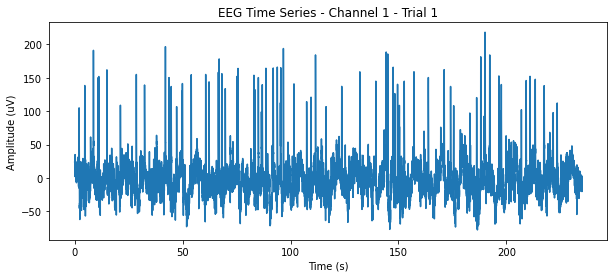

In [12]:
import matplotlib.pyplot as plt

# Select a channel to visualize (e.g. channel 1)
channel = 1

# Select a trial to visualize (e.g. trial 1)
trial = 1
data=new_data[2]
# Extract the data for the selected channel and trial
trial_data = data[prefix_values[2] + '{}'.format(trial)]
channel_data = trial_data[channel, :]

# Create a time vector based on the sampling rate (200 Hz)
time = np.arange(len(channel_data)) / 200.0

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time, channel_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Time Series - Channel {} - Trial {}'.format(channel, trial))
plt.show()


In [13]:
# define a function to calculate the power spectral density of the data
def calculate_PSD(data, fs):
    freqs, psd = signal.welch(data, fs=fs, nperseg=1024)
    return freqs, psd

# extract features for each channel
def extract_features(trial_data, fs):
    features = []
    for channel in range(62):
        # apply a bandpass filter to the data
        filtered_data = butter_bandpass_filter(trial_data[channel,:], 0.5, 40, fs, order=5)
        
        # calculate the power spectral density of the filtered data
        freqs, psd = calculate_PSD(filtered_data, fs)
        
        # calculate the average power in the delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz), and gamma (30-40 Hz) frequency bands
        delta_power = np.mean(psd[(freqs>=0.5) & (freqs<=4)])
        theta_power = np.mean(psd[(freqs>=4) & (freqs<=8)])
        alpha_power = np.mean(psd[(freqs>=8) & (freqs<=12)])
        beta_power = np.mean(psd[(freqs>=12) & (freqs<=30)])
        gamma_power = np.mean(psd[(freqs>=30) & (freqs<=40)])
        
        # append the features for this channel to the list of features for this trial
        features.append(delta_power)
        features.append(theta_power)
        features.append(alpha_power)
        features.append(beta_power)
        features.append(gamma_power)
        
    return features


In [14]:
from scipy.signal import butter, filtfilt

# define a function to apply a butterworth filter to the data
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# loop over all trials and extract features
fs = 200 # sampling rate
all_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_features = extract_features(trial_data, fs)
        all_features.append(trial_features)

# convert the list of features to a pandas dataframe
feature_names = []
for channel in range(1,63):
    feature_names.append('delta_{}'.format(channel))
    feature_names.append('theta_{}'.format(channel))
    feature_names.append('alpha_{}'.format(channel))
    feature_names.append('beta_{}'.format(channel))
    feature_names.append('gamma_{}'.format(channel))
df_psd = pd.DataFrame(all_features, columns=feature_names)


In [22]:
df_psd

,delta_1,theta_1,alpha_1,beta_1,gamma_1,delta_2,theta_2,alpha_2,beta_2,gamma_2,...,delta_61,theta_61,alpha_61,beta_61,gamma_61,delta_62,theta_62,alpha_62,beta_62,gamma_62
0,62.277078,13.425494,3.673042,1.043611,0.528276,58.242838,12.311525,3.416384,0.673558,0.274149,...,16.766950,5.521614,2.640996,0.824993,0.306118,17.874709,5.614681,2.696756,0.875940,0.315314
1,98.088584,13.567802,3.544869,0.973119,0.575904,94.223409,12.356318,3.284490,0.602724,0.315013,...,16.490080,4.062164,2.337163,0.700937,0.217306,17.367672,4.230677,2.416726,0.764466,0.239700
2,105.080827,23.644107,6.575421,1.330921,0.777146,102.335533,22.077646,6.127342,0.873971,0.445530,...,18.287961,5.047971,2.303969,0.689838,0.240681,20.070924,5.277394,2.346874,0.737334,0.247031
3,69.479885,14.122634,3.985305,1.353062,1.057533,68.155460,13.330524,3.643079,0.816871,0.612748,...,15.282336,4.321887,2.599288,0.699034,0.246512,16.793166,4.553060,2.576695,0.786450,0.283268
4,100.054541,11.606677,3.262101,1.340245,1.018637,97.550862,10.771595,2.951099,0.737216,0.550821,...,16.760203,4.057205,3.337985,0.825226,0.297022,18.271396,4.257621,3.260728,0.860516,0.295006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,56.801325,3.866519,0.904462,0.289470,0.121456,60.638599,4.068164,0.936850,0.253844,0.096823,...,10.515987,1.210271,0.715105,0.388445,0.159576,13.937115,1.496901,0.908577,0.489576,0.162568
446,39.411819,2.857009,0.828281,0.232577,0.077290,42.719918,2.894276,0.833318,0.217944,0.072782,...,7.997984,1.063516,0.497020,0.215428,0.062377,9.947324,1.376355,0.611469,0.291861,0.062345
447,51.295223,3.449722,0.790358,0.382939,0.188415,57.632185,3.630105,0.871522,0.572488,0.300589,...,9.352002,1.286125,0.746777,0.570703,0.299474,12.055316,1.604906,0.917146,0.745943,0.341092
448,30.466884,2.807007,0.726660,0.284350,0.112751,33.707960,2.888423,0.738547,0.282509,0.119696,...,8.434491,1.278594,0.512750,0.311962,0.133871,10.309248,1.585150,0.642802,0.351679,0.101155


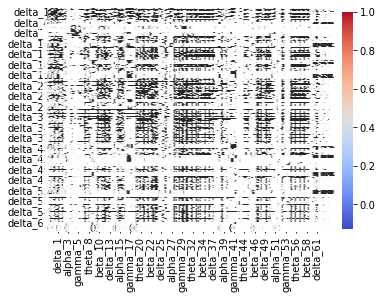

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
df_temp = df.iloc[15, :]

# compute the correlation matrix
corr_matrix = df_temp.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# identify the most important features based on correlation
corr_threshold = 0.7  # adjust as needed
important_features = corr_matrix[(corr_matrix > corr_threshold) & (corr_matrix < 1.0)].dropna(how='all', axis=1).index.tolist()

# select only the important features
df_psd_important = df_temp[important_features]


In [22]:
df_psd

,delta_1,theta_1,alpha_1,beta_1,gamma_1,delta_2,theta_2,alpha_2,beta_2,gamma_2,...,delta_61,theta_61,alpha_61,beta_61,gamma_61,delta_62,theta_62,alpha_62,beta_62,gamma_62
0,62.277078,13.425494,3.673042,1.043611,0.528276,58.242838,12.311525,3.416384,0.673558,0.274149,...,16.766950,5.521614,2.640996,0.824993,0.306118,17.874709,5.614681,2.696756,0.875940,0.315314
1,98.088584,13.567802,3.544869,0.973119,0.575904,94.223409,12.356318,3.284490,0.602724,0.315013,...,16.490080,4.062164,2.337163,0.700937,0.217306,17.367672,4.230677,2.416726,0.764466,0.239700
2,105.080827,23.644107,6.575421,1.330921,0.777146,102.335533,22.077646,6.127342,0.873971,0.445530,...,18.287961,5.047971,2.303969,0.689838,0.240681,20.070924,5.277394,2.346874,0.737334,0.247031
3,69.479885,14.122634,3.985305,1.353062,1.057533,68.155460,13.330524,3.643079,0.816871,0.612748,...,15.282336,4.321887,2.599288,0.699034,0.246512,16.793166,4.553060,2.576695,0.786450,0.283268
4,100.054541,11.606677,3.262101,1.340245,1.018637,97.550862,10.771595,2.951099,0.737216,0.550821,...,16.760203,4.057205,3.337985,0.825226,0.297022,18.271396,4.257621,3.260728,0.860516,0.295006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,56.801325,3.866519,0.904462,0.289470,0.121456,60.638599,4.068164,0.936850,0.253844,0.096823,...,10.515987,1.210271,0.715105,0.388445,0.159576,13.937115,1.496901,0.908577,0.489576,0.162568
446,39.411819,2.857009,0.828281,0.232577,0.077290,42.719918,2.894276,0.833318,0.217944,0.072782,...,7.997984,1.063516,0.497020,0.215428,0.062377,9.947324,1.376355,0.611469,0.291861,0.062345
447,51.295223,3.449722,0.790358,0.382939,0.188415,57.632185,3.630105,0.871522,0.572488,0.300589,...,9.352002,1.286125,0.746777,0.570703,0.299474,12.055316,1.604906,0.917146,0.745943,0.341092
448,30.466884,2.807007,0.726660,0.284350,0.112751,33.707960,2.888423,0.738547,0.282509,0.119696,...,8.434491,1.278594,0.512750,0.311962,0.133871,10.309248,1.585150,0.642802,0.351679,0.101155


In [15]:
# define a function to calculate the power spectral density of the data
def calculate_PSD(data, fs):
    freqs, psd = signal.welch(data, fs=fs, nperseg=1024)
    return freqs, psd

# extract features for each channel
def extract_features(trial_data, fs):
    features = []
    for channel in range(62):
        # apply a bandpass filter to the data
        filtered_data = butter_bandpass_filter(trial_data[channel,:], 0.5, 40, fs, order=5)
        
        # calculate the power spectral density of the filtered data
        freqs, psd = calculate_PSD(filtered_data, fs)
        
        # calculate the average power in the delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz), and gamma (30-40 Hz) frequency bands
        delta_power = np.mean(psd[(freqs>=0.5) & (freqs<=4)])
        theta_power = np.mean(psd[(freqs>=4) & (freqs<=8)])
        alpha_power = np.mean(psd[(freqs>=8) & (freqs<=12)])
        beta_power = np.mean(psd[(freqs>=12) & (freqs<=30)])
        gamma_power = np.mean(psd[(freqs>=30) & (freqs<=40)])
        
        # calculate the total power in all frequency bands
        total_power = np.sum([delta_power, theta_power, alpha_power, beta_power, gamma_power])
        
        # calculate the DE feature for each frequency band
        delta_DE = delta_power / total_power
        theta_DE = theta_power / total_power
        alpha_DE = alpha_power / total_power
        beta_DE = beta_power / total_power
        gamma_DE = gamma_power / total_power
        
        # append the features for this channel to the list of features for this trial
        features.append(delta_DE)
        features.append(theta_DE)
        features.append(alpha_DE)
        features.append(beta_DE)
        features.append(gamma_DE)
        
    return features

# loop over all trials and extract features
fs = 200 # sampling rate
all_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_features = extract_features(trial_data, fs)
        all_features.append(trial_features)

# convert the list of features to a pandas dataframe
feature_names = []
for channel in range(1,63):
    feature_names.append('delta_DE_{}'.format(channel))
    feature_names.append('theta_DE_{}'.format(channel))
    feature_names.append('alpha_DE_{}'.format(channel))
    feature_names.append('beta_DE_{}'.format(channel))
    feature_names.append('gamma_DE_{}'.format(channel))
df_DE = pd.DataFrame(all_features, columns=feature_names)

In [24]:
df_DE

,delta_DE_1,theta_DE_1,alpha_DE_1,beta_DE_1,gamma_DE_1,delta_DE_2,theta_DE_2,alpha_DE_2,beta_DE_2,gamma_DE_2,...,delta_DE_61,theta_DE_61,alpha_DE_61,beta_DE_61,gamma_DE_61,delta_DE_62,theta_DE_62,alpha_DE_62,beta_DE_62,gamma_DE_62
0,0.769351,0.165854,0.045376,0.012892,0.006526,0.777416,0.164332,0.045601,0.008991,0.003659,...,0.643381,0.211875,0.101340,0.031657,0.011746,0.652900,0.205085,0.098503,0.031995,0.011517
1,0.840157,0.116212,0.030363,0.008335,0.004933,0.850530,0.111537,0.029648,0.005441,0.002844,...,0.692638,0.170624,0.098169,0.029442,0.009128,0.694173,0.169097,0.096595,0.030555,0.009581
2,0.764734,0.172072,0.047853,0.009686,0.005656,0.776092,0.167432,0.046469,0.006628,0.003379,...,0.688283,0.189985,0.086712,0.025963,0.009058,0.699834,0.184012,0.081831,0.025709,0.008613
3,0.772012,0.156921,0.044282,0.015034,0.011751,0.787390,0.154006,0.042088,0.009437,0.007079,...,0.660171,0.186698,0.112285,0.030197,0.010649,0.671924,0.182176,0.103098,0.031467,0.011334
4,0.853109,0.098964,0.027814,0.011428,0.008685,0.866644,0.095695,0.026218,0.006549,0.004894,...,0.663045,0.160506,0.132053,0.032646,0.011750,0.678093,0.158010,0.121013,0.031936,0.010948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.916398,0.062380,0.014592,0.004670,0.001960,0.918846,0.061644,0.014196,0.003846,0.001467,...,0.809583,0.093174,0.055053,0.029905,0.012285,0.820084,0.088080,0.053462,0.028808,0.009566
446,0.907960,0.065819,0.019082,0.005358,0.001781,0.914025,0.061925,0.017829,0.004663,0.001557,...,0.813107,0.108121,0.050529,0.021901,0.006342,0.809426,0.111996,0.049756,0.023749,0.005073
447,0.914245,0.061485,0.014087,0.006825,0.003358,0.914697,0.057614,0.013832,0.009086,0.004771,...,0.763112,0.104946,0.060936,0.046569,0.024437,0.769599,0.102456,0.058550,0.047620,0.021775
448,0.885726,0.081605,0.021125,0.008267,0.003278,0.893231,0.076541,0.019571,0.007486,0.003172,...,0.790363,0.119812,0.048048,0.029233,0.012545,0.793628,0.122028,0.049484,0.027073,0.007787


In [16]:
from scipy.signal import butter, lfilter, hilbert
# define a function to calculate the DASM for a given frequency band
def calculate_DASM(data, fs, freq_band):
    filtered_data = butter_bandpass_filter(data, freq_band[0], freq_band[1], fs, order=5)
    phase_angles = np.angle(hilbert(filtered_data))
    return np.abs(np.mean(np.exp(1j*phase_angles)))

# define a function to calculate the DASM feature for each channel
def extract_dasm_features(trial_data, fs):
    features = []
    freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
    for channel in range(62):
        dasm_values = []
        for freq_band in freq_bands.values():
            dasm_values.append(calculate_DASM(trial_data[channel,:], fs, freq_band))
        features.extend(dasm_values)
    return features

# define a function to calculate the DASM feature for each channel
# def extract_dasm_features(trial_data, fs):
#     features = []
#     freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
#     for val in dasm_channel.values():
#         dasm_values = []
#         for freq_band in freq_bands.values():
#             dasm_values.append(calculate_DASM(trial_data[val,:], fs, freq_band))
#         features.extend(dasm_values)
#     return features

# loop over all trials and extract DASM features
all_dasm_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_dasm_features = extract_dasm_features(trial_data, fs)
        all_dasm_features.append(trial_dasm_features)

# convert the list of DASM features to a pandas dataframe
dasm_feature_names = []
freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
for channel in range(1,63):
    for freq_band in freq_bands.keys():
        dasm_feature_names.append('{}_{}_dasm'.format(freq_band, channel))
df_dasm = pd.DataFrame(all_dasm_features, columns=dasm_feature_names)

In [32]:
from scipy.signal import butter, lfilter, hilbert
# define a function to calculate the DASM for a given frequency band
def calculate_DASM(data, fs, freq_band):
    filtered_data = butter_bandpass_filter(data, freq_band[0], freq_band[1], fs, order=5)
    phase_angles = np.angle(hilbert(filtered_data))
    return np.abs(np.mean(np.exp(1j*phase_angles)))

# define a function to calculate the DASM feature for each channel
def extract_dasm_features(trial_data, fs):
    features = []
    freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
    for channel in range(62):
        dasm_values = []
        if channel in dasm_channel.values():
            for freq_band in freq_bands.values():
                dasm_values.append(calculate_DASM(trial_data[channel,:], fs, freq_band))
            features.extend(dasm_values)
        else:
            for freq_band in freq_bands.values():
                dasm_values.append(0)
            features.extend(dasm_values)
    return features

# define a function to calculate the DASM feature for each channel
# def extract_dasm_features(trial_data, fs):
#     features = []
#     freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
#     for val in dasm_channel.values():
#         dasm_values = []
#         for freq_band in freq_bands.values():
#             dasm_values.append(calculate_DASM(trial_data[val,:], fs, freq_band))
#         features.extend(dasm_values)
#     return features

# loop over all trials and extract DASM features
all_dasm_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_dasm_features = extract_dasm_features(trial_data, fs)
        all_dasm_features.append(trial_dasm_features)

# convert the list of DASM features to a pandas dataframe
dasm_feature_names = []
freq_bands = {'delta': [0.5, 4], 'theta': [4, 8], 'alpha': [8, 12], 'beta': [12, 30], 'gamma': [30, 40]}
for channel in range(1,63):
    for freq_band in freq_bands.keys():
        dasm_feature_names.append('{}_{}_dasm'.format(freq_band, channel))
df_dasm = pd.DataFrame(all_dasm_features, columns=dasm_feature_names)

In [17]:
df_dasm

,delta_1_dasm,theta_1_dasm,alpha_1_dasm,beta_1_dasm,gamma_1_dasm,delta_2_dasm,theta_2_dasm,alpha_2_dasm,beta_2_dasm,gamma_2_dasm,...,delta_61_dasm,theta_61_dasm,alpha_61_dasm,beta_61_dasm,gamma_61_dasm,delta_62_dasm,theta_62_dasm,alpha_62_dasm,beta_62_dasm,gamma_62_dasm
0,0.032677,0.009739,0.001605,0.000925,0.000871,0.034293,0.010908,0.003348,0.002861,0.000135,...,0.035544,0.001087,0.001232,0.002694,0.000971,0.034399,0.001909,0.000182,0.003480,0.000138
1,0.034637,0.008951,0.000335,0.002618,0.000058,0.033978,0.012874,0.002659,0.002856,0.000902,...,0.035088,0.001375,0.002440,0.003510,0.000543,0.035496,0.001868,0.000941,0.002794,0.000486
2,0.038256,0.009503,0.002343,0.006628,0.000401,0.037231,0.011100,0.000658,0.001950,0.000458,...,0.040935,0.003995,0.000951,0.002915,0.000578,0.038061,0.002497,0.001168,0.001464,0.000377
3,0.034268,0.008991,0.001516,0.002034,0.000058,0.034073,0.012840,0.001633,0.002568,0.000308,...,0.033705,0.001077,0.000878,0.000737,0.000676,0.034683,0.002724,0.001398,0.003220,0.000283
4,0.045784,0.007489,0.000758,0.003237,0.000279,0.044356,0.006597,0.000434,0.001687,0.000715,...,0.043538,0.004287,0.000585,0.004174,0.000655,0.044172,0.003697,0.000293,0.002033,0.000854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.035155,0.004490,0.002467,0.000736,0.000483,0.034073,0.005473,0.000450,0.001742,0.000498,...,0.033388,0.001922,0.001291,0.002135,0.000231,0.032808,0.004951,0.001778,0.002881,0.000789
446,0.034003,0.008733,0.000580,0.002075,0.000039,0.036633,0.007024,0.001802,0.002685,0.000413,...,0.035400,0.002281,0.001066,0.003278,0.000551,0.032915,0.005468,0.001155,0.005272,0.000944
447,0.033882,0.004190,0.001124,0.000892,0.000734,0.036251,0.005893,0.002956,0.003256,0.000894,...,0.034467,0.004526,0.001623,0.001725,0.000783,0.032910,0.006926,0.002061,0.001190,0.000623
448,0.032723,0.001494,0.000932,0.001840,0.000308,0.033890,0.001892,0.001695,0.000355,0.000571,...,0.034025,0.004686,0.000987,0.003411,0.000947,0.033764,0.005997,0.002405,0.004449,0.000544


In [ ]:
fs = 200 # sampling rate
all_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_features = extract_features(trial_data, fs)
        all_features.append(trial_features)

# convert the list of features to a pandas dataframe
feature_names = []
n_channels = 62
for i in range(n_channels):
    for j in range(i+1, n_channels):
        feature_names.append('dasm_{}_{}'.format(i+1, j+1))
df_dasm = pd.DataFrame(all_features, columns=feature_names)


In [18]:
from sklearn.decomposition import PCA

# instantiate the PCA class
pca = PCA(n_components=3)

# fit the model to the data and transform the data
pca_features = pca.fit_transform(df_psd)

# create a pandas dataframe to store the PCA features
df_pca = pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2', 'PCA_3'])

In [ ]:
from scipy.signal import coherence

# extract features for each channel
def extract_features(trial_data, fs):
    features = []
    n_channels = trial_data.shape[0]
    
    # loop over pairs of channels
    for i in range(n_channels):
        for j in range(i+1, n_channels):
            # apply a bandpass filter to the data of both channels
            filtered_data_i = butter_bandpass_filter(trial_data[i,:], 0.5, 40, fs, order=5)
            filtered_data_j = butter_bandpass_filter(trial_data[j,:], 0.5, 40, fs, order=5)
            
            # calculate the coherence between the filtered data of both channels
            f, Cxy = coherence(filtered_data_i, filtered_data_j, fs=fs, nperseg=1024)
            
            # calculate the average coherence in the delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz), and gamma (30-40 Hz) frequency bands
            delta_coh = np.mean(Cxy[(f>=0.5) & (f<=4)])
            theta_coh = np.mean(Cxy[(f>=4) & (f<=8)])
            alpha_coh = np.mean(Cxy[(f>=8) & (f<=12)])
            beta_coh = np.mean(Cxy[(f>=12) & (f<=30)])
            gamma_coh = np.mean(Cxy[(f>=30) & (f<=40)])
            
            # calculate the DASM by subtracting the coherence of the left pair from the coherence of the right pair
            dasm = (beta_coh - alpha_coh) - (theta_coh - delta_coh)
            
            # append the DASM for this pair of channels to the list of features for this trial
            features.append(dasm)
        
    return features


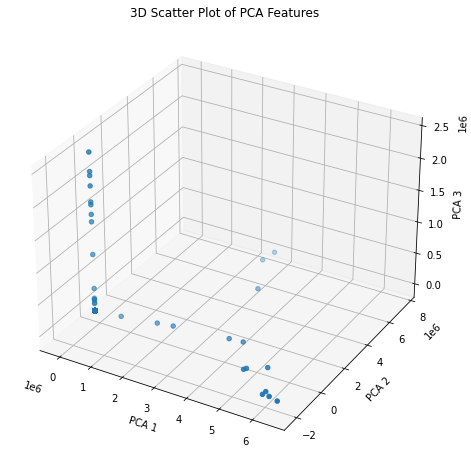

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# create a new figure and axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the PCA data
ax.scatter(df_pca['PCA_1'], df_pca['PCA_2'], df_pca['PCA_3'])

# set the axis labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of PCA Features')

# show the plot
plt.show()


In [50]:
from sklearn.decomposition import PCA

# Create a PCA object with n_components equal to the number of features in your dataset
pca = PCA(n_components=len(df_psd.columns))

# Fit the PCA model to your data
pca.fit(df_psd)

# Convert PCA transformed data back to a pandas dataframe with same column names
pca_psd = pd.DataFrame(data = pca.transform(df_psd), columns = df_psd.columns)


# Print the first 5 rows of the transformed dataframe
print(pca_psd.head())
pca_psd

         delta_1       theta_1      alpha_1        beta_1      gamma_1  \
0 -140369.661865 -25053.869331 -9510.862290 -40449.044077 -5672.444352   
1 -140372.258663 -25053.235764 -9509.366152 -40444.566177 -5671.159687   
2 -140371.675472 -25053.861277 -9510.731677 -40442.488871 -5670.019953   
3 -140372.440254 -25053.045393 -9511.038151 -40449.577772 -5673.101201   
4 -140371.514358 -25050.611168 -9508.911732 -40448.171963 -5669.737848   

        delta_2      theta_2     alpha_2       beta_2      gamma_2  ...  \
0 -12878.837320  2775.607728 -851.974033 -1655.647526 -1887.437427  ...   
1 -12876.857770  2773.489719 -850.352041 -1649.460730 -1882.718729  ...   
2 -12871.968982  2772.358013 -848.356958 -1647.374648 -1879.201329  ...   
3 -12879.279022  2775.540470 -853.330958 -1656.477688 -1887.398196  ...   
4 -12878.192451  2775.284907 -852.102608 -1654.752223 -1887.044719  ...   

   theta_61  alpha_61   beta_61  gamma_61  delta_62  theta_62  alpha_62  \
0 -0.000024  0.002778 -0.0010

,delta_1,theta_1,alpha_1,beta_1,gamma_1,delta_2,theta_2,alpha_2,beta_2,gamma_2,...,theta_61,alpha_61,beta_61,gamma_61,delta_62,theta_62,alpha_62,beta_62,gamma_62,label
0,-140369.661865,-25053.869331,-9510.862290,-40449.044077,-5672.444352,-12878.837320,2775.607728,-851.974033,-1655.647526,-1887.437427,...,-0.000024,0.002778,-0.001092,0.000939,0.000050,-0.000545,0.000816,0.000740,0.001148,0.000732
1,-140372.258663,-25053.235764,-9509.366152,-40444.566177,-5671.159687,-12876.857770,2773.489719,-850.352041,-1649.460730,-1882.718729,...,-0.001170,-0.000841,0.002133,-0.001626,0.001137,-0.000937,0.000007,0.000146,-0.000569,-0.000583
2,-140371.675472,-25053.861277,-9510.731677,-40442.488871,-5670.019953,-12871.968982,2772.358013,-848.356958,-1647.374648,-1879.201329,...,-0.001491,-0.002069,-0.002417,0.000266,0.001173,0.000275,0.002092,-0.001067,-0.000072,0.000016
3,-140372.440254,-25053.045393,-9511.038151,-40449.577772,-5673.101201,-12879.279022,2775.540470,-853.330958,-1656.477688,-1887.398196,...,-0.000119,0.000287,0.001028,0.002743,-0.000643,0.000847,0.000839,-0.001022,-0.001042,0.000347
4,-140371.514358,-25050.611168,-9508.911732,-40448.171963,-5669.737848,-12878.192451,2775.284907,-852.102608,-1654.752223,-1887.044719,...,-0.002307,0.001598,-0.004159,-0.000895,0.001240,-0.002227,-0.001192,0.001484,0.000764,0.000680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-140376.896709,-25054.440575,-9514.306875,-40449.946109,-5679.680221,-12880.978325,2774.211348,-854.645979,-1655.771855,-1888.026073,...,-0.005400,0.000001,0.001304,-0.003894,-0.000125,-0.000391,0.000611,0.001415,-0.000665,0.000074
446,-140377.119782,-25054.522248,-9514.962914,-40452.473177,-5680.963490,-12882.231600,2774.823698,-856.366443,-1658.400258,-1888.182766,...,0.000284,-0.000654,-0.001120,-0.000251,0.000485,-0.000058,0.000237,0.000145,0.000615,0.000334
447,-140376.854496,-25054.470007,-9514.680705,-40449.128001,-5680.088260,-12881.297132,2773.534804,-855.455432,-1656.360667,-1885.732866,...,0.000720,0.000253,-0.000522,0.001221,-0.000585,0.000484,-0.000341,-0.000034,0.000045,0.000022
448,-140376.948835,-25054.559537,-9515.049523,-40452.116015,-5680.849339,-12882.497002,2774.726589,-856.085359,-1659.220765,-1888.078479,...,0.000600,0.000316,0.000758,0.000878,-0.001014,0.000310,-0.000440,0.000414,-0.000370,-0.000421


In [45]:
len(pca_psd)

450

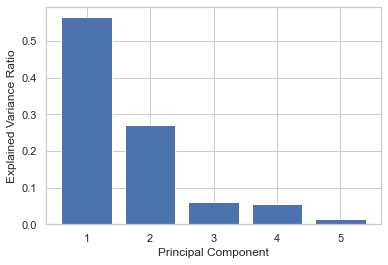

In [152]:
from sklearn.decomposition import PCA

# Perform PCA on the psd features
pca = PCA(n_components=5)
pca.fit(df_psd)

# Transform the data to its principal components
df_psd_pca = pca.transform(df_psd)

# Create a new dataframe with the principal components
df_pca = pd.DataFrame(df_psd_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# # Add the trial and subject labels to the dataframe
# df_pca['trial'] = np.repeat(range(1, 16), 62)
# df_pca['subject'] = np.repeat(range(1, 110), 15*62)

# Visualize the explained variance by each principal component
import matplotlib.pyplot as plt
plt.bar(range(1,6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [59]:
# loop over all trials and calculate the DE feature
de_features = []
for i in range(len(df_psd)):
    trial_de = []
    count = 0
    for channel in range(62):
        for band_name, (f_low, f_high) in bands:
            # extract the PSD values for this channel and frequency band
            psd_values = df_psd.iloc[i, count]
            # calculate the differential entropy for the PSD values
            de = calculate_DE(psd_values)
            # append the DE value to the list for this trial
            trial_de.append(de)
            count += 1
    # append the list of DE values for this trial to the list of all DE values
    de_features.append(trial_de)

C:\Users\gayas\anaconda3\envs\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


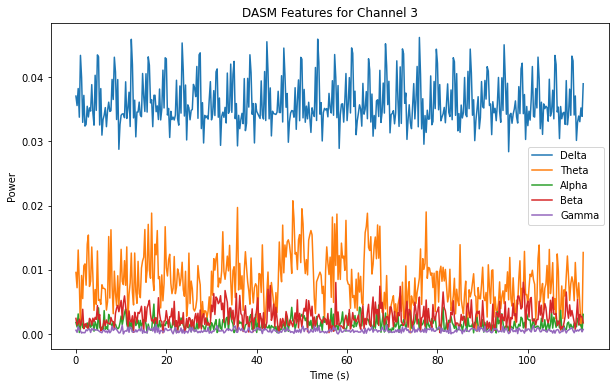

In [71]:
import matplotlib.pyplot as plt

# create a time array for plotting
time = np.arange(len(df_dasm)) * 0.25  # assuming a sampling rate of 200 Hz

# plot the PSD features for each channel
# for channel in range(1, 63):
channel=3
plt.figure(figsize=(10, 6))
plt.plot(time, df_dasm['delta_{}_dasm'.format(channel)], label='Delta')
plt.plot(time, df_dasm['theta_{}_dasm'.format(channel)], label='Theta')
plt.plot(time, df_dasm['alpha_{}_dasm'.format(channel)], label='Alpha')
plt.plot(time, df_dasm['beta_{}_dasm'.format(channel)], label='Beta')
plt.plot(time, df_dasm['gamma_{}_dasm'.format(channel)], label='Gamma')
plt.xlabel('Time (s)')
plt.ylabel('Power')
plt.title('DASM Features for Channel {}'.format(channel))
plt.legend()
plt.show()


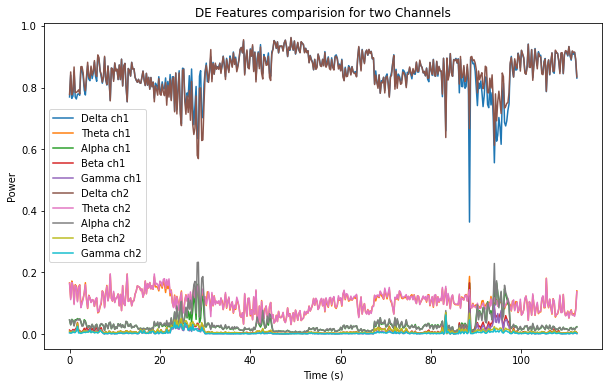

In [76]:
# create a time array for plotting
time = np.arange(len(df_DE)) * 0.25  # assuming a sampling rate of 200 Hz

# plot the PSD features for all channels
plt.figure(figsize=(10, 6))
for channel in range(1, 3):
    plt.plot(time, df_DE['delta_DE_{}'.format(channel)], label='Delta ch{}'.format(channel))
    plt.plot(time, df_DE['theta_DE_{}'.format(channel)], label='Theta ch{}'.format(channel))
    plt.plot(time, df_DE['alpha_DE_{}'.format(channel)], label='Alpha ch{}'.format(channel))
    plt.plot(time, df_DE['beta_DE_{}'.format(channel)], label='Beta ch{}'.format(channel))
    plt.plot(time, df_DE['gamma_DE_{}'.format(channel)], label='Gamma ch{}'.format(channel))

plt.xlabel('Time (s)')
plt.ylabel('Power')
plt.title('DE Features comparision for two Channels')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Power Spectral Density Features')

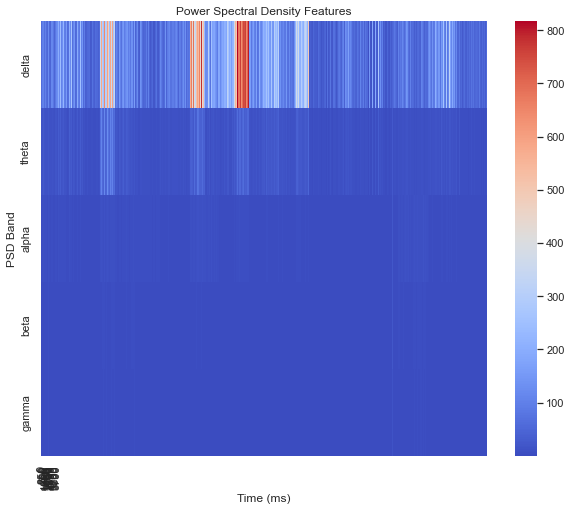

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for the plot
sns.set(style='whitegrid')

# set the figure size
plt.figure(figsize=(10, 8))

# define the x-axis as time points (assuming each trial is 4 seconds)
x = np.arange(0, 4000, 250)

# define the y-axis as the different PSD bands
y = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# extract the PSD features for each band and trial
features = []
channel=1
for band in y:
#     for channel in range(1, 63):
    feature_name = '{}_{}'.format(band, channel)
    features.append(df_psd_important[feature_name].values)
        
# create the heatmap using seaborn
ax = sns.heatmap(features, cmap='coolwarm', xticklabels=x, yticklabels=y)

# set the axis labels and title
ax.set_xlabel('Time (ms)')
ax.set_ylabel('PSD Band')
ax.set_title('Power Spectral Density Features')


In [17]:
import scipy.io
freq_data=scipy.io.loadmat('freq_data.mat')['freq_data']
freq_data[1,2,:]

array([39.76879282, 58.33267026, 68.30023904, 66.27868391, 83.42609902])

In [ ]:
fs = 200 # sampling rate
all_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_features = extract_features(trial_data, fs)
        all_features.append(trial_features)

# convert the list of features to a pandas dataframe
feature_names = []
for channel in range(1,63):
    feature_names.append('delta_{}'.format(channel))
    feature_names.append('theta_{}'.format(channel))
    feature_names.append('alpha_{}'.format(channel))
    feature_names.append('beta_{}'.format(channel))
    feature_names.append('gamma_{}'.format(channel))
    feature_names.append('de_{}'.format(channel))
df = pd.DataFrame(all_features, columns=feature_names)

In [80]:
labels_arr

array([ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1],
      dtype=int16)

In [18]:
def add_label_to_df(df,labels_arr):
    count = 0
    index = 0
    y_data = []
    for trial in range(30):
        for i in labels_arr:
            y_data.append(i)
    df.loc[:, 'label'] = y_data
    
    return df

In [34]:
df_dasm_comp=add_label_to_df(df_dasm_comp,labels_arr)

In [19]:
#DF and PSD dataframe setup:
df_dasm=add_label_to_df(df_dasm,labels_arr)
df_DE=add_label_to_df(df_DE,labels_arr)
df_dasm=add_label_to_df(df_dasm,labels_arr)

In [20]:
#extract only specific frequency
de_delta = df_DE.loc[:, df_DE.columns.str.startswith('delta_DE_')]
de_alpha = df_DE.loc[:, df_DE.columns.str.startswith('alpha_DE_')]
de_gamma = df_DE.loc[:, df_DE.columns.str.startswith('gamma_DE_')]
de_theta = df_DE.loc[:, df_DE.columns.str.startswith('theta_DE_')]
de_beta = df_DE.loc[:, df_DE.columns.str.startswith('beta_DE_')]

In [21]:
#extract only specific frequency
psd_delta = df_psd.loc[:, df_psd.columns.str.startswith('delta_')]
psd_alpha = df_psd.loc[:, df_psd.columns.str.startswith('alpha_')]
psd_gamma = df_psd.loc[:, df_psd.columns.str.startswith('gamma_')]
psd_theta = df_psd.loc[:, df_psd.columns.str.startswith('theta_')]
psd_beta = df_psd.loc[:, df_psd.columns.str.startswith('beta_')]

In [24]:
#extract only specific frequency
dasm_delta = df_dasm.loc[:, df_dasm.columns.str.startswith('delta_')]
dasm_alpha = df_dasm.loc[:, df_dasm.columns.str.startswith('alpha_')]
dasm_gamma = df_dasm.loc[:, df_dasm.columns.str.startswith('gamma_')]
dasm_theta = df_dasm.loc[:, df_dasm.columns.str.startswith('theta_')]
dasm_beta = df_dasm.loc[:, df_dasm.columns.str.startswith('beta_')]

In [27]:
#frequency data added with data frame labels... DE
de_delta=add_label_to_df(de_delta,labels_arr)
de_alpha=add_label_to_df(de_alpha,labels_arr)
de_gamma=add_label_to_df(de_gamma,labels_arr)
de_theta=add_label_to_df(de_theta,labels_arr)
de_beta=add_label_to_df(de_beta,labels_arr)

C:\Users\gayas\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [28]:
#frequency data added with data frame labels... DE
dasm_delta=add_label_to_df(dasm_delta,labels_arr)
dasm_alpha=add_label_to_df(dasm_alpha,labels_arr)
dasm_gamma=add_label_to_df(dasm_gamma,labels_arr)
dasm_theta=add_label_to_df(dasm_theta,labels_arr)
dasm_beta=add_label_to_df(dasm_beta,labels_arr)

In [29]:
#frequency data added with data frame labels... PSD
psd_delta=add_label_to_df(psd_delta,labels_arr)
psd_alpha=add_label_to_df(psd_alpha,labels_arr)
psd_gamma=add_label_to_df(psd_gamma,labels_arr)
psd_theta=add_label_to_df(psd_theta,labels_arr)
psd_beta=add_label_to_df(psd_beta,labels_arr)

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
scaler = MinMaxScaler()

columns_to_scale=[]
for col in df_psd:
    columns_to_scale.append(col)
columns_to_scale.pop(len(columns_to_scale) - 1)

# Scale the data
df_psd[columns_to_scale] = scaler.fit_transform(df_psd[columns_to_scale])

# View the scaled data
print(df_psd.head())


    delta_1   theta_1   alpha_1    beta_1   gamma_1   delta_2   theta_2  \
0  0.064322  0.091896  0.147630  0.039017  0.030827  0.060883  0.082885   
1  0.108692  0.093039  0.141598  0.035769  0.033907  0.106466  0.083244   
2  0.117356  0.173928  0.284214  0.052257  0.046920  0.116743  0.161239   
3  0.073247  0.097493  0.162325  0.053277  0.065050  0.073441  0.091060   
4  0.111128  0.077295  0.128292  0.052687  0.062535  0.110681  0.070530   

    alpha_2    beta_2   gamma_2  ...  theta_61  alpha_61   beta_61  gamma_61  \
0  0.225610  0.086318  0.058776  ...  0.059569  0.029059  0.007955  0.004855   
1  0.215402  0.073449  0.069118  ...  0.040144  0.025032  0.006336  0.003234   
2  0.435424  0.122728  0.102150  ...  0.053265  0.024592  0.006191  0.003661   
3  0.243155  0.112354  0.144470  ...  0.043601  0.028506  0.006311  0.003767   
4  0.189600  0.097883  0.128797  ...  0.040078  0.038297  0.007958  0.004689   

   delta_62  theta_62  alpha_62   beta_62  gamma_62  label  
0  0.00

In [112]:
df_dasm_temp=df_dasm[(df_DE['label'] == 1) | (df_dasm['label'] == -1)]
df_dasm_temp

,delta_1_dasm,theta_1_dasm,alpha_1_dasm,beta_1_dasm,gamma_1_dasm,delta_2_dasm,theta_2_dasm,alpha_2_dasm,beta_2_dasm,gamma_2_dasm,...,theta_61_dasm,alpha_61_dasm,beta_61_dasm,gamma_61_dasm,delta_62_dasm,theta_62_dasm,alpha_62_dasm,beta_62_dasm,gamma_62_dasm,label
0,0.032677,0.009739,0.001605,0.000925,0.000871,0.034293,0.010908,0.003348,0.002861,0.000135,...,0.001087,0.001232,0.002694,0.000971,0.034399,0.001909,0.000182,0.003480,0.000138,1
2,0.038256,0.009503,0.002343,0.006628,0.000401,0.037231,0.011100,0.000658,0.001950,0.000458,...,0.003995,0.000951,0.002915,0.000578,0.038061,0.002497,0.001168,0.001464,0.000377,-1
3,0.034268,0.008991,0.001516,0.002034,0.000058,0.034073,0.012840,0.001633,0.002568,0.000308,...,0.001077,0.000878,0.000737,0.000676,0.034683,0.002724,0.001398,0.003220,0.000283,-1
5,0.041201,0.007471,0.001587,0.001214,0.000597,0.042247,0.008547,0.000546,0.001644,0.000453,...,0.006554,0.001178,0.001810,0.000833,0.041109,0.004610,0.000376,0.002943,0.001017,1
6,0.032696,0.006072,0.000938,0.002599,0.000533,0.034168,0.005845,0.001603,0.002633,0.000559,...,0.004563,0.000683,0.002689,0.000562,0.034315,0.003785,0.000284,0.005676,0.000582,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.029058,0.003723,0.002162,0.001754,0.000984,0.029331,0.003410,0.001477,0.001167,0.000543,...,0.004403,0.001626,0.002077,0.000813,0.030927,0.006284,0.000384,0.003522,0.000415,1
444,0.031697,0.008098,0.002807,0.002006,0.000578,0.031448,0.004892,0.000905,0.004069,0.000808,...,0.002462,0.002086,0.000741,0.000290,0.034255,0.001616,0.003497,0.003333,0.000258,1
446,0.034003,0.008733,0.000580,0.002075,0.000039,0.036633,0.007024,0.001802,0.002685,0.000413,...,0.002281,0.001066,0.003278,0.000551,0.032915,0.005468,0.001155,0.005272,0.000944,-1
448,0.032723,0.001494,0.000932,0.001840,0.000308,0.033890,0.001892,0.001695,0.000355,0.000571,...,0.004686,0.000987,0.003411,0.000947,0.033764,0.005997,0.002405,0.004449,0.000544,1


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

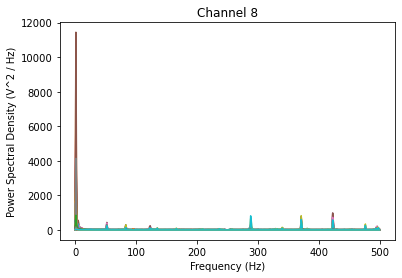

In [67]:
import matplotlib.pyplot as plt

# loop over all channels and plot the PSD
channel=7
plt.figure()
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)][channel,:]
        freqs, psd = calculate_PSD(trial_data, fs)
        plt.plot(freqs, psd)
plt.title('Channel {}'.format(channel+1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2 / Hz)')
plt.show()


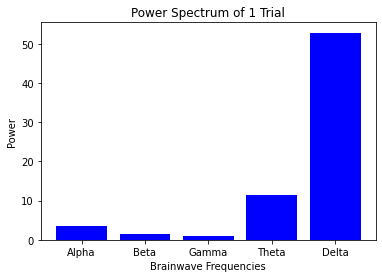

In [154]:
import matplotlib.pyplot as plt

# Extract the alpha, beta, gamma, theta, and delta power values from the df_psd DataFrame
alpha_power = df_DE.loc[0, 'alpha_3']
beta_power = df_DE.loc[0, 'beta_3']
gamma_power = df_DE.loc[0, 'gamma_3']
theta_power = df_DE.loc[0, 'theta_3']
delta_power = df_DE.loc[0, 'delta_3']

# Plot the power values using a bar chart
x_labels = ['Alpha', 'Beta', 'Gamma', 'Theta', 'Delta']
x_pos = [i for i, _ in enumerate(x_labels)]
powers = [alpha_power, beta_power, gamma_power, theta_power, delta_power]

plt.bar(x_pos, powers, color='BLUE')
plt.xlabel("Brainwave Frequencies")
plt.ylabel("Power")
plt.title("Power Spectrum of 1 Trial")

plt.xticks(x_pos, x_labels)

plt.show()

In [84]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dasm_gamma.drop('label', axis=1), dasm_gamma['label'], test_size=0.2, random_state=42)

Accuracy: 0.32222222222222224
Cross-validation accuracy: 0.51 (+/- 0.50)


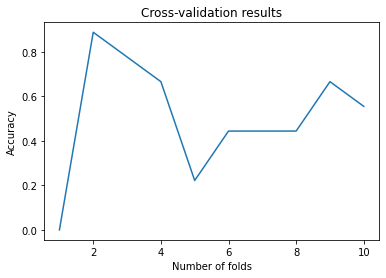

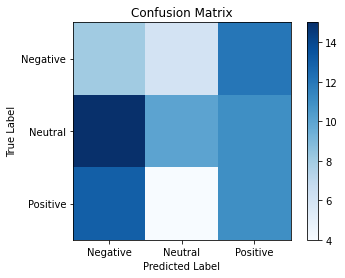

C:\Users\gayas\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


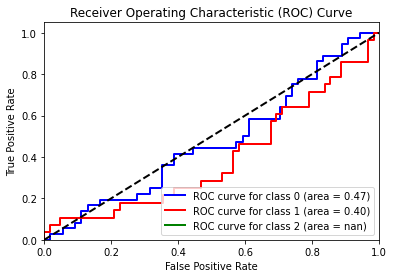

In [85]:
#this
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, precision_score, recall_score, roc_curve, auc, confusion_matrix

# feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# hyperparameter tuning
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [5, 10, 20, 30, None]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# evaluate the model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


n_folds=10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# perform cross-validation
cv_results = cross_val_score(rf, X_test, y_test, cv=kf)

# print the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

import matplotlib.pyplot as plt

# plot the cross-validation scores
plt.plot(range(1, 11), cv_results)
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()


# Predict probabilities for each class
y_score = best_rf.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve for class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Cross-validation accuracy: 0.34 (+/- 0.35)


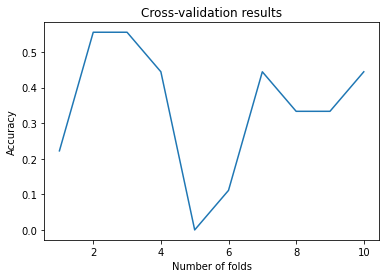

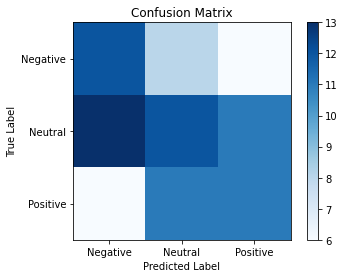

C:\Users\gayas\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


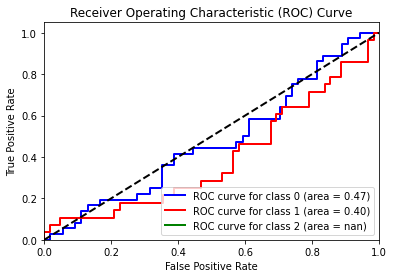

In [86]:
#this
#DECISION TREE
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, roc_curve, auc, confusion_matrix
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# # Precision
# precision = precision_score(y_test, y_pred, average='weighted')
# print("Precision:", precision)

# # Recall
# recall = recall_score(y_test, y_pred, average='weighted')
# print("Recall:", recall)

# y_pred_prob = rf.predict_proba(X_test)
# roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
# print('ROC AUC:', roc_auc)

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

n_folds=10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# perform cross-validation
cv_results = cross_val_score(clf, X_test, y_test, cv=kf)

# print the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

import matplotlib.pyplot as plt

# plot the cross-validation scores
plt.plot(range(1, 11), cv_results)
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Predict probabilities for each class
y_score = best_rf.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve for class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.4666666666666667
Cross-validation accuracy: 0.34 (+/- 0.42)


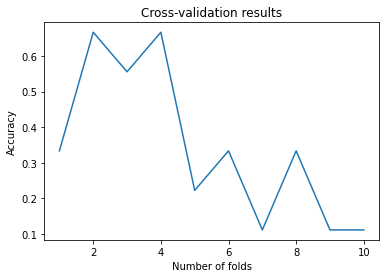

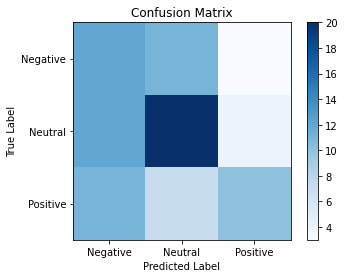

C:\Users\gayas\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


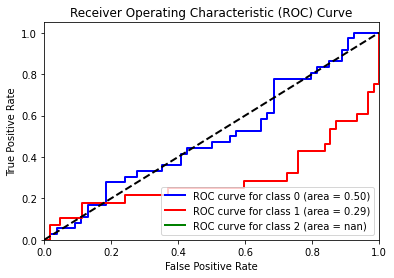

In [56]:
#this
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score                                 

n_folds = 10

# Create an SVM classifier
svm = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Train the classifier on the training set
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# # define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# perform cross-validation
cv_results = cross_val_score(clf, X_test, y_test, cv=kf)

# print the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

import matplotlib.pyplot as plt

# plot the cross-validation scores
plt.plot(range(1, 11), cv_results)
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Predict probabilities for each class
y_score = svm.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve for class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.feature_selection import RFE

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=30, step=1)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
clf = svc.fit(X_train_rfe, y_train)
score = clf.score(X_test_rfe, y_test)
print("Accuracy:", score)


Accuracy: 0.6


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned
params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}

# Create the Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)
print("Test Accuracy:", grid_search.score(X_test, y_test))

Best Hyperparameters: {'max_depth': 15, 'n_estimators': 300}
Training Accuracy: 0.6611111111111111
Test Accuracy: 0.6888888888888889


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on training data
knn.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn.predict(X_test)

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.36666666666666664


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt

# define a function to apply a butterworth filter to the data
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# define a function to calculate the power spectral density of the data
def calculate_PSD(data, fs):
    freqs, psd = signal.welch(data, fs=fs, nperseg=1024)
    return freqs, psd

# extract features for each channel
def extract_features(trial_data, fs):
    features = []
    for channel in range(62):
        # apply a bandpass filter to the data
        filtered_data = butter_bandpass_filter(trial_data[channel,:], 0.5, 30, fs, order=5)
        
        # calculate the power spectral density of the filtered data
        freqs, psd = calculate_PSD(filtered_data, fs)
        
        # calculate the average power in the alpha (8-12 Hz) and beta (12-30 Hz) frequency bands
        alpha_power = np.mean(psd[(freqs>=8) & (freqs<=12)])
        beta_power = np.mean(psd[(freqs>=12) & (freqs<=30)])
        
        # append the features for this channel to the list of features for this trial
        features.append(alpha_power)
        features.append(beta_power)
    return features

# loop over all trials and extract features
fs = 200 # sampling rate
all_features = []
for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        trial_features = extract_features(trial_data, fs)
        all_features.append(trial_features)

# convert the list of features to a pandas dataframe
feature_names = []
for channel in range(1,63):
    feature_names.append('alpha_{}'.format(channel))
    feature_names.append('beta_{}'.format(channel))
df = pd.DataFrame(all_features, columns=feature_names)

In [16]:
# Define function to calculate differential entropy (DE) for a given frequency band
def compute_de(x, fs, f_low, f_high):
    # Define function to calculate Shannon entropy
    def shannon_entropy(y):
        bins = np.histogram(y, bins='auto')[1]
        hist, _ = np.histogram(y, bins=bins, density=True)
        hist = hist[np.nonzero(hist)]
        return -np.sum(hist*np.log2(hist))

    # Apply bandpass filter to EEG data
    b, a = signal.butter(4, [f_low*2/fs, f_high*2/fs], btype='bandpass')
    x_filt = signal.filtfilt(b, a, x)

    # Calculate DE using Shannon entropy
    de = shannon_entropy(x_filt) - shannon_entropy(x)

    return de

In [17]:
prefix_values=['ww_eeg','ww_eeg','ww_eeg','wyw_eeg','wyw_eeg','wyw_eeg','xyl_eeg','xyl_eeg','xyl_eeg','zjy_eeg','zjy_eeg','zjy_eeg','djc_eeg','djc_eeg','djc_eeg','jj_eeg','jj_eeg','jj_eeg','lqj_eeg','lqj_eeg','lqj_eeg','mhw_eeg','mhw_eeg','mhw_eeg','sxy_eeg','sxy_eeg','sxy_eeg','wk_eeg','wk_eeg','wk_eeg']

In [18]:
import numpy as np
from scipy import signal
from scipy.integrate import simps

# Define frequency bands
freq_bands = {'delta': (1, 3), 'theta': (4, 7), 'alpha': (8, 13), 'beta': (14, 30), 'gamma': (31, 50)}

# Define an empty array to store the frequency data
freq_data = np.zeros((len(new_data), 15, len(freq_bands)))

for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        
        # Filter data in each frequency band and calculate DE
        fs = 200  # Sampling rate in Hz
        filtered_data = []
        for band in freq_bands:
            f_low, f_high = freq_bands[band]
            b, a = signal.butter(4, [f_low*2/fs, f_high*2/fs], btype='bandpass')
            filtered_data.append(signal.filtfilt(b, a, trial_data))
        
        # Calculate DE for each frequency band
        for band_index, band in enumerate(freq_bands):
            f_low, f_high = freq_bands[band]
            freq_data[data_index, trial-1, band_index] = compute_de(trial_data, fs, f_low, f_high)

# Save the frequency data to a .mat file
import scipy.io
scipy.io.savemat('freq_data.mat', {'freq_data': freq_data})


In [75]:
import scipy.io
freq_data=scipy.io.loadmat('freq_data.mat')['freq_data']
freq_data.shape

(30, 15, 5)

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DE data from the .mat file
import scipy.io
freq_data = scipy.io.loadmat('freq_data.mat')['freq_data']

# Select an experiment to plot (for example, the first one)
experiment_index = 0
experiment_data = freq_data[experiment_index]

# Define the frequency band labels and colors
freq_labels = ['delta', 'theta', 'alpha', 'beta', 'gamma']
colors = sns.color_palette('muted', len(freq_labels))

# Define the time axis
fs = 200
time_axis = np.linspace(0, 4000/fs, 4000)

# Plot a heat map for each frequency band
for i, band in enumerate(freq_labels):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(experiment_data[:, i, :].T, cmap=colors[i], cbar_kws={'label': 'DE'})
    ax.set_xlabel('Trial')
    ax.set_ylabel('Time (s)')
    ax.set_yticks(np.linspace(0, len(time_axis)-1, 5))
    ax.set_yticklabels(np.round(time_axis[::800], decimals=2)[::-1])
    ax.set_title('DE for {} band'.format(band))
    plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 576x432 with 0 Axes>

In [76]:
delta_feature1 = np.array(freq_data[0,:,0])# example delta features
theta_feature1 = np.array(freq_data[0,0,1])  # example theta features
alpha_feature1 = np.array(freq_data[0,0,2])  # example alpha features
beta_feature1 = np.array(freq_data[0,0,3])  # example beta features
gamma_feature1 = np.array(freq_data[0,0,4])  # example gamma features


In [78]:
delta_feature1

array([41.24042796, 41.22995584, 42.04641367, 45.85870746, 39.45734392,
       39.15501966, 44.44072006, 38.98673078, 43.6105104 , 43.43599489,
       40.65827236, 39.48886664, 42.76163915, 45.17779938, 44.67825892])

In [74]:
feature_vector1 = np.concatenate((delta_feature1, theta_feature1, alpha_feature1, beta_feature1, gamma_feature1))

ValueError: zero-dimensional arrays cannot be concatenated

In [68]:
feature_vector1.shape

(150,)

In [54]:
normalized_DE_feature1 = (feature_vector1 - np.mean(feature_vector1)) / np.std(feature_vector1)

In [56]:
sns.heatmap(normalized_DE_feature1, cmap='coolwarm', cbar=False)

IndexError: Inconsistent shape between the condition and the input (got (75, 1) and (75,))

In [42]:
# prefix_values=['ww_eeg','ww_eeg','ww_eeg','wyw_eeg','wyw_eeg','wyw_eeg','xyl_eeg','xyl_eeg','xyl_eeg','zjy_eeg','zjy_eeg','zjy_eeg','djc_eeg','djc_eeg','djc_eeg','jj_eeg','jj_eeg','jj_eeg','lqj_eeg','lqj_eeg','lqj_eeg','mhw_eeg','mhw_eeg','mhw_eeg','sxy_eeg','sxy_eeg','sxy_eeg','wk_eeg','wk_eeg','wk_eeg']

# Define frequency bands
freq_bands = {'delta': (1, 3), 'theta': (4, 7), 'alpha': (8, 13), 'beta': (14, 30), 'gamma': (31, 50)}

# Define an empty array to store the frequency data
freq_data_2 = np.zeros((len(new_data), 15, len(freq_bands), 2))

for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        
        # Filter data in each frequency band and calculate DASM and DACU
        fs = 200  # Sampling rate in Hz
        dasm_data = np.zeros((len(freq_bands)))
        dacu_data = np.zeros((len(freq_bands)))
        for band_index, band in enumerate(freq_bands):
            f_low, f_high = freq_bands[band]
            b, a = signal.butter(4, [f_low*2/fs, f_high*2/fs], btype='bandpass')
            filtered_data = signal.filtfilt(b, a, trial_data)
            hilbert_data = signal.hilbert(filtered_data)
            phase_data = np.unwrap(np.angle(hilbert_data))
            dasm_data[band_index] = np.abs(np.mean(np.exp(1j * phase_data)))
            dacu_data[band_index] = np.sqrt(np.mean(np.power(np.abs(hilbert_data) - np.abs(np.mean(hilbert_data)), 2)))
        
        # Save DASM and DACU for each frequency band
        freq_data_2[data_index, trial-1, :, 0] = dasm_data
        freq_data_2[data_index, trial-1, :, 1] = dacu_data

# Save the frequency data to a .mat file
import scipy.io
scipy.io.savemat('freq_data_2.mat', {'freq_data_2': freq_data_2})


In [103]:
freq_data_2.shape

(30, 15, 5, 2)

ValueError: x and y must have same first dimension, but have shapes (51,) and (5, 51)

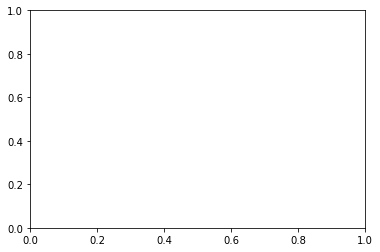

In [69]:
#psd not completed
from scipy import signal
import matplotlib.pyplot as plt

fs = 200 # Sampling rate in Hz
freq_bands = {'delta': (1, 3), 'theta': (4, 7), 'alpha': (8, 13), 'beta': (14, 30), 'gamma': (31, 50)}
 # Frequency bands of interest
nperseg = int(fs*0.5) # Number of samples per segment

psd_data = np.zeros((len(new_data), 15, len(freq_bands), int(nperseg/2)+1))

for data_index, data in enumerate(new_data):
    for trial in range(1, 16):
        trial_data = data[prefix_values[data_index] + '{}'.format(trial)]
        for band_index, band in enumerate(freq_bands):
            f_low, f_high = freq_bands[band]
            f, psd = signal.welch(trial_data, fs=fs, nperseg=nperseg, scaling='spectrum')
            indices = np.where((f>=f_low) & (f<=f_high))[0]
            if indices.size > 0:
                psd_data[data_index, trial-1, band_index, :] = np.mean(psd[indices], axis=0)


# Plot the PSD data for one trial of the first subject
plt.plot(f, psd_data[0,0,:,:])
plt.legend(freq_bands)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import simps
from scipy.signal import welch
import mne

# Define frequency bands of interest
freq_bands = {'delta': [1, 4],
              'theta': [4, 8],
              'alpha': [8, 13],
              'beta': [13, 30],
              'gamma': [30, 50]}

# Define list of file names
file_names = ['file1.edf', 'file2.edf', 'file3.edf', ...]

# Initialize 3D array to store PSD for each file, trial and frequency band
psd_data = np.zeros((len(file_names), 10, len(freq_bands)))

# Loop over file names and calculate PSD for each file
for file_index, file_name in enumerate(file_names):
    # Load EEG data from file
    raw = mne.io.read_raw_edf(file_name, preload=True)
    data = raw.get_data()

    # Calculate PSD for each trial and frequency band
    for trial in range(1, 11):
        for band_index, (band_name, (f_low, f_high)) in enumerate(freq_bands.items()):
            # Calculate PSD using Welch's method
            f, psd = welch(data[trial-1], raw.info['sfreq'], nperseg=2048)

            # Apply frequency band mask and integrate to obtain PSD value
            mask = np.logical_and(f >= f_low, f <= f_high)
            psd_band = simps(psd[mask], f[mask])
            psd_data[file_index, trial-1, band_index] = psd_band
            
    # Print progress message
    print(f'PSD calculated for file {file_name}')

# Save PSD data to file
np.save('psd_data.npy', psd_data)


In [56]:
import numpy as np
from scipy.integrate import simps
import glob

# Define frequency bands of interest
bands = [(0.5, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 45, 'Gamma')]

# Define the directory path containing the trial data files
dir_path = './trial_data/'

# Iterate over all the files in the directory
for file_path in glob.glob(dir_path + '*.npy'):

    # Load trial data from file
    trial_data = np.load(file_path)

    # Calculate PSD for each trial and frequency band
    psd_data = np.zeros((len(trial_data), len(bands)))
    for data_index in range(len(trial_data)):
        for band_index, (f_low, f_high, band_name) in enumerate(bands):
            f, psd = welch(trial_data[data_index], fs=128, nperseg=512)
            mask = np.logical_and(f >= f_low, f <= f_high)
            psd_band = simps(psd[mask], f[mask])
            psd_data[data_index, band_index] = psd_band

    # Save the PSD data to a file
    file_name = file_path.split('/')[-1].split('.')[0]
    np.save(f'{file_name}_psd.npy', psd_data)


In [57]:
psd_data

array([[[0.00334263, 0.01126647],
        [0.00297393, 0.01302056],
        [0.00217319, 0.01066407],
        [0.00260731, 0.00979282],
        [0.00316679, 0.01165123],
        [0.00359938, 0.0114057 ],
        [0.003681  , 0.01144781],
        [0.00187105, 0.00993962],
        [0.00274178, 0.01120556],
        [0.00298361, 0.01022214]],

       [[0.00373777, 0.01407035],
        [0.00158424, 0.011633  ],
        [0.00411217, 0.00898651],
        [0.00296255, 0.01007188],
        [0.00389186, 0.01293483],
        [0.00218412, 0.00846384],
        [0.00221633, 0.01054106],
        [0.00191422, 0.01500273],
        [0.00262928, 0.01226967],
        [0.00254098, 0.0109517 ]],

       [[0.00390965, 0.01325916],
        [0.00337936, 0.01224292],
        [0.00230939, 0.01093371],
        [0.00279738, 0.00984126],
        [0.00193347, 0.01310325],
        [0.00267685, 0.01083966],
        [0.00266042, 0.01115342],
        [0.00276932, 0.01400076],
        [0.00359484, 0.01024698],
        [0

In [88]:
# Load the DE, PSD, DASM, and DACU data from their respective .mat files
de_data = scipy.io.loadmat('freq_data.mat')['freq_data']
dasm_data = scipy.io.loadmat('freq_data_2.mat')['freq_data_2'][:,:,:,0]
dacu_data = scipy.io.loadmat('freq_data_2.mat')['freq_data_2'][:,:,:,1]
# Concatenate the feature arrays along the last axis
feature_data = np.concatenate([de_data,dasm_data,dacu_data], axis=-1)
# Load the labels from the label.mat file
labels = y_data
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=42)
# Train a machine learning model (e.g. a Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [117]:
de_data = scipy.io.loadmat('freq_data.mat')['freq_data']
de_data_delta=de_data[:,:,0]
de_data_delta.shape[1]

array([[41.24042796, 41.22995584, 42.04641367, 45.85870746, 39.45734392,
        39.15501966, 44.44072006, 38.98673078, 43.6105104 , 43.43599489,
        40.65827236, 39.48886664, 42.76163915, 45.17779938, 44.67825892],
       [37.37892709, 40.13613218, 39.76879282, 39.50045496, 36.57364251,
        37.50057223, 42.86904285, 40.2034281 , 45.00827432, 40.15107873,
        40.04218839, 44.57734172, 45.06716755, 44.57979009, 40.84018156],
       [36.25610462, 39.90373906, 37.05790466, 40.98279652, 37.30783901,
        35.05479079, 42.32908414, 43.36423401, 43.38199706, 42.15414521,
        47.52705398, 45.26632171, 44.97704469, 45.3550781 , 44.70533736],
       [35.60338595, 29.96004047, 36.49900958, 41.23159645, 27.48180601,
        36.5391671 , 41.25450629, 28.77930891, 37.91954469, 39.79225807,
        32.27461666, 38.6870255 , 33.33819278, 44.04111238, 39.67022879],
       [42.33757337, 45.36254271, 43.83704583, 47.77503508, 40.97706141,
        42.31677898, 48.70574783, 41.99810978, 

In [152]:
!pip install pyeeg
import numpy as np
import pyeeg

# Create a feature map using the DE values
feature_map = np.zeros_like(new_data)
for i in range(len(de_data_delta)):
    start_index = int(i * segment_length * (1 - overlap))
    end_index = start_index + segment_length
    feature_map[start_index:end_index] = de_data_delta[i]

# Plot the feature map
import matplotlib.pyplot as plt
plt.plot(new_data)
plt.imshow(feature_map[np.newaxis, :], aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'pyeeg'

In [139]:
temp=de_data[:,:,1]
temp_use=temp.reshape(temp.shape[0], -1)
temp_use

array([[58.76769328, 61.73052882, 59.58207017, 62.17812394, 55.75984709,
        54.41707603, 60.36549074, 57.31675871, 60.47687194, 59.32724915,
        59.83358266, 58.32073956, 57.67456277, 61.6308579 , 60.71188864],
       [57.44709682, 61.67149503, 58.33267026, 58.18879147, 57.23075448,
        53.93129006, 62.41144882, 60.36814766, 64.84400666, 59.05200476,
        61.98643812, 65.14488119, 63.90992796, 63.75678016, 60.17859803],
       [52.54948291, 56.64617519, 53.91274506, 56.16797946, 52.00767783,
        49.79921432, 57.16151526, 56.59258148, 58.83381129, 56.93997908,
        59.6703179 , 60.63622335, 59.51406594, 58.45609747, 59.25912467],
       [55.49778467, 50.8947289 , 54.49929217, 55.96274039, 46.19077386,
        51.56167526, 54.97641801, 44.17261019, 54.84143015, 54.39680975,
        46.1754246 , 52.83488396, 48.51841444, 55.3714098 , 53.41369867],
       [60.40781706, 64.32730848, 63.1056688 , 67.75269488, 59.78668417,
        59.63083081, 66.64207612, 60.15485949, 

In [140]:
feature_data = temp_use
labels = np.array(y_data)

In [142]:
# Load the DE, DASM, and DACU data from their respective .mat files
# de_data = scipy.io.loadmat('freq_data.mat')['freq_data']
# # dasm_data = scipy.io.loadmat('freq_data_2.mat')['freq_data_2'][:,:,:,0]
# # dacu_data = scipy.io.loadmat('freq_data_2.mat')['freq_data_2'][:,:,:,1]
# # Concatenate the feature arrays along the last axis
# # feature_data = np.concatenate([de_data,dasm_data,dacu_data], axis=-1)
# feature_data = de_data
# # output data has 
# labels = np.array(y_data)
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# X_train_2d = X_train.reshape((X_train.shape[0], -1))
# X_test_2d = X_test.reshape((X_test.shape[0], -1))

# Create an instance of the SVM classifier
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(X_train_2d, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test_2d)

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
report = classification_report(y_test, y_pred)
print(report)



Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
import numpy as np
import scipy.io

# Load the DE, PSD, DASM, and DACU data from their respective .mat files
de_data = scipy.io.loadmat('freq_d.mat')['de_data']
psd_data = scipy.io.loadmat('psd_data.mat')['psd_data']
dasm_data = scipy.io.loadmat('dasm_data.mat')['dasm_data']
dacu_data = scipy.io.loadmat('dacu_data.mat')['dacu_data']

# Concatenate the feature arrays along the last axis
feature_data = np.concatenate([de_data, psd_data, dasm_data, dacu_data], axis=-1)

# Load the labels from the label.mat file
labels = scipy.io.loadmat('label.mat')['label'].flatten()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=42)

# Train a machine learning model (e.g. a Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


In [36]:
import numpy as np
from scipy import signal
from scipy.integrate import simps
from scipy.io import savemat

# Define frequency bands
freq_bands = {'delta': (1, 3), 'theta': (4, 7), 'alpha': (8, 13), 'beta': (14, 30), 'gamma': (31, 50)}

# Define an empty array to store the feature data
n_trials = 15
n_bands = len(freq_bands)
n_channels = 62
n_features = n_bands * n_channels * 3  # PSD, DASM, and RASM for each frequency band
feature_data = np.zeros((30, n_trials, n_features))

count = 0
for data_index, data in enumerate(new_data):
    
    for trial in range(1, n_trials + 1):
        
        # Extract EEG data for current trial
        eeg_data = data[prefix_values[count] + str(trial)]
        
        # Calculate DASM and RASM for each frequency band
        dasm_data = []
        rasm_data = []
        for band in freq_bands:
            f_low, f_high = freq_bands[band]
            # Calculate coherence between all pairs of channels
            coherence, freqs = signal.coherence(eeg_data, eeg_data.copy(), fs=200, nperseg=256)
            idx = np.logical_and(freqs >= f_low, freqs <= f_high)
            coherence_band = coherence[idx]
            # Calculate DASM and RASM
            dasm = np.zeros((n_channels, n_channels))
            rasm = np.zeros((n_channels, n_channels))
            for i in range(n_channels):
                for j in range(i + 1, n_channels):
                    dasm[i, j] = np.abs(np.mean(coherence_band[i, :] - coherence_band[j, :]))
                    rasm[i, j] = np.abs(np.mean(coherence_band[i, :] + coherence_band[j, :]))
            dasm_data.append(dasm[np.triu_indices(n_channels, k=1)])
            rasm_data.append(rasm[np.triu_indices(n_channels, k=1)])
        
        # Store the features in the feature data array
        features = np.concatenate(dasm_data + rasm_data)
        feature_data[data_index, trial-1, :] = features
        
    count += 1
    
# Save the feature data to a .mat file
feature_data_dict = {'features': feature_data}
savemat('feature_data.mat', feature_data_dict)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#output data
count = 0
index = 0
y_data = []
for file in full_data:
    if count < 2:
        count += 1
        if labels_arr[index] != 0:
            y_data.append(labels_arr[index])
    else:
        if labels_arr[index] != 0:
            y_data.append(labels_arr[index])
        count = 0
        index += 1
